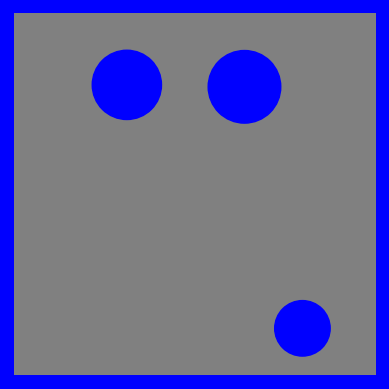

In [751]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import matplotlib.cm as cm
import random

# Function to check if a dot overlaps with existing dots
def check_overlap(x, y, r, existing_dots):
    if (x - r < margin) or (x + r > square_size - margin) or (y - r < margin) or (y + r > square_size - margin):
        return True
    for (ex, ey, er) in existing_dots:
        if np.sqrt((x - ex) ** 2 + (y - ey) ** 2) < r + er + 0.5:
            return True
    return False

# Function to generate random dots without overlapping
def generate_dots(num_dots, size_bounds, square_size, margin):
    existing_dots = []
    while len(existing_dots) < num_dots:
        r = np.random.uniform(size_bounds[0], size_bounds[1])
        x = np.random.uniform(margin + r, square_size - (margin + r))
        y = np.random.uniform(margin + r, square_size - (margin + r))
        if not check_overlap(x, y, r, existing_dots):
            existing_dots.append((x, y, r))
    return existing_dots

def generate_dice(set_num,use_color=True,pure_color=False):
    stimuli_sets = np.zeros([set_num,4,4], dtype='object')
    colormap_list = ['Greys', 'Purples', 'Blues', 
    'Greens', 'Oranges', 'Reds', 'YlGn', 'YlGnBu', 'GnBu', 'BuGn', 'PuBuGn', 'BuPu', 
    'RdPu', 'PuRd', 'OrRd', 'YlOrRd', 'YlOrBr', 'PuBu']
    for set_number in range(set_num):
        random_cmap = random.choice(colormap_list)
        rand_num = random.uniform(0, 0.25)
        print(rand_num)
        values = np.linspace(0+rand_num, 1, 4)
        cmap = plt.get_cmap(random_cmap)
        colors = [cmap(value) for value in values]
        for grad_set in range(1,5):
            dot_color = colors[grad_set-1]
            edge_color = colors[grad_set-1]
            if pure_color == True:
                fig, ax = plt.subplots()
                fig.patch.set_facecolor(background_color)
                fig.patch.set_edgecolor(edge_color)
                fig.patch.set_linewidth(20)
                ax.set_xlim(0, square_size)
                ax.set_ylim(0, square_size)
                ax.set_aspect('equal')
                ax.axis('off')
                circle = plt.Circle((6, 6), 5, color=dot_color)
                ax.add_artist(circle)
                plt.show() 
            else:       
                for dot_num in range(1,5):
                    dots = generate_dots(dot_num, size_bounds, square_size, frame_width)
                    stimuli_sets[set_number,grad_set-1,dot_num-1] = dots
                    if use_color == False:
                        dot_color = 'black'
                        edge_color = 'black'
                    fig, ax = plt.subplots()
                    fig.patch.set_facecolor(background_color)
                    fig.patch.set_edgecolor(edge_color)
                    fig.patch.set_linewidth(20)
                    ax.set_xlim(0, square_size)
                    ax.set_ylim(0, square_size)
                    ax.set_aspect('equal')
                    ax.axis('off')
                    for (x, y, r) in dots:
                        circle = plt.Circle((x, y), r, color=dot_color)
                        ax.add_artist(circle)
                    plt.show()
    return stimuli_sets

# Parameters
square_size = 12
num_dots = 3
size_bounds = (0.5, 1.2)
dot_color = 'blue'       
background_color = '#808080'   
frame_color = 'blue'          
frame_width = 10
margin = frame_width/150 + size_bounds[1]/2           

# Generate dots
dots = generate_dots(num_dots, size_bounds, square_size, frame_width)

# Create plot
fig, ax = plt.subplots()
fig.patch.set_facecolor(background_color)
fig.patch.set_edgecolor('blue')
fig.patch.set_linewidth(20)
ax.set_xlim(0, square_size)
ax.set_ylim(0, square_size)
ax.set_aspect('equal')
ax.axis('off')

# Draw frame


# Draw dots
for (x, y, r) in dots:
    circle = plt.Circle((x, y), r, color=dot_color)
    ax.add_artist(circle)

plt.show()

0.05861229127403067


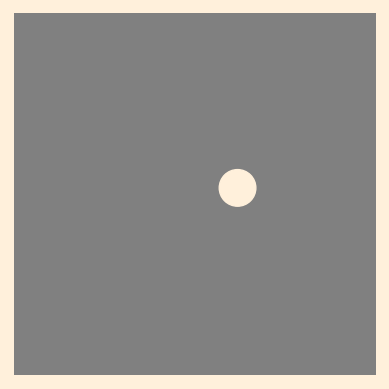

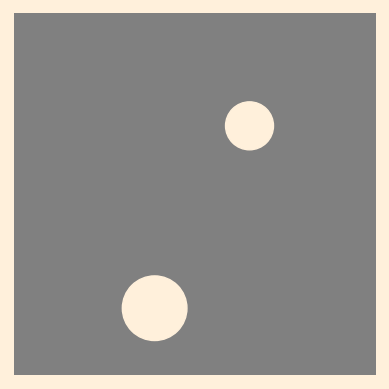

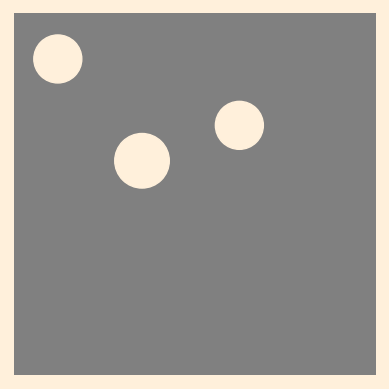

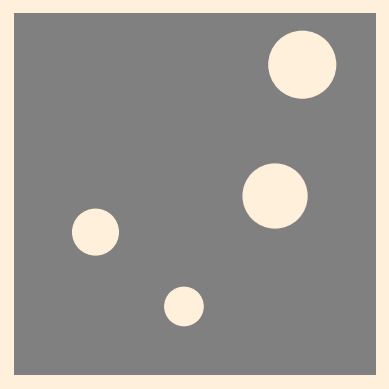

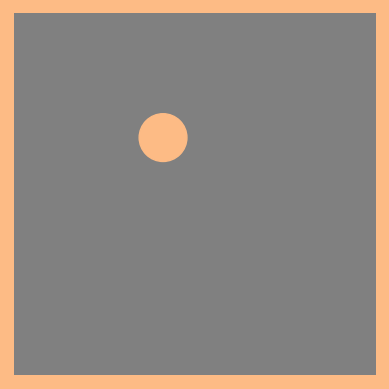

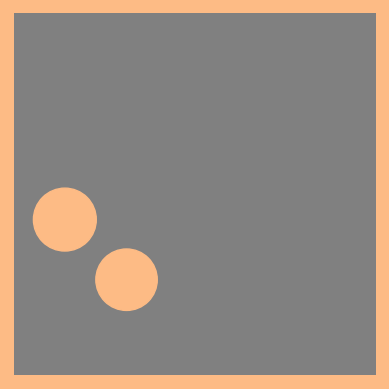

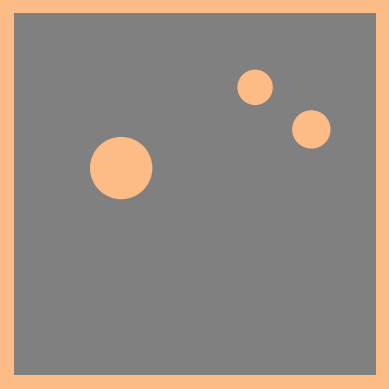

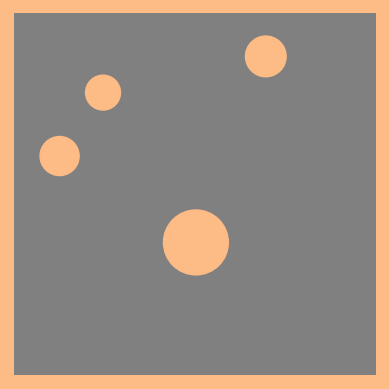

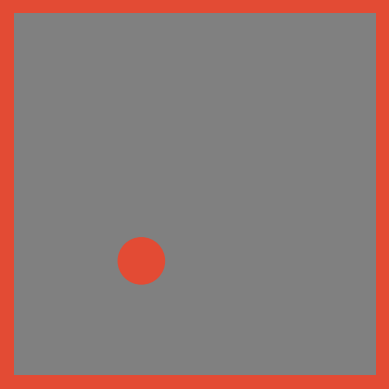

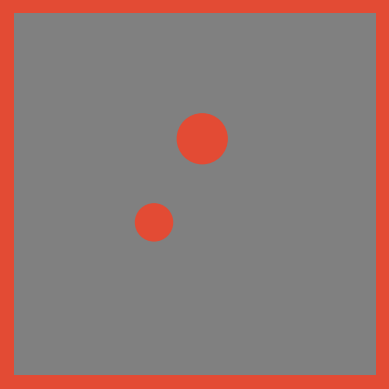

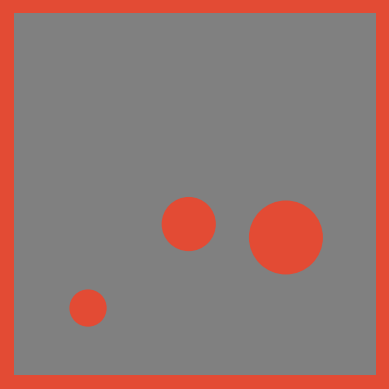

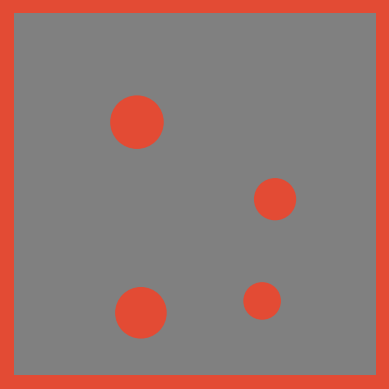

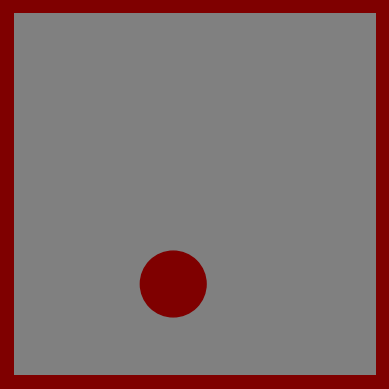

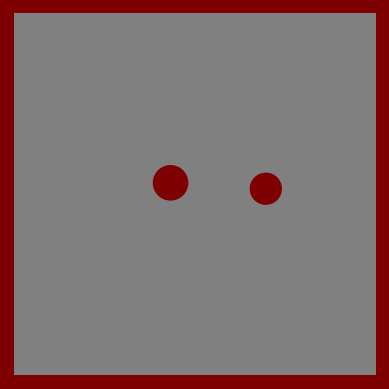

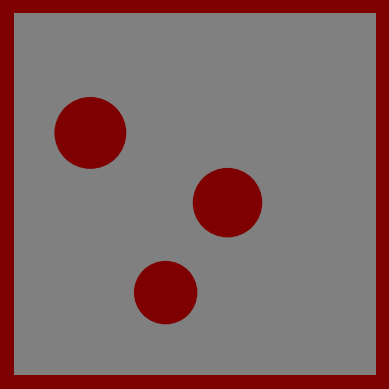

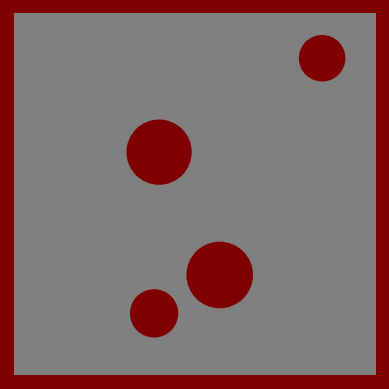

0.18697237345892015


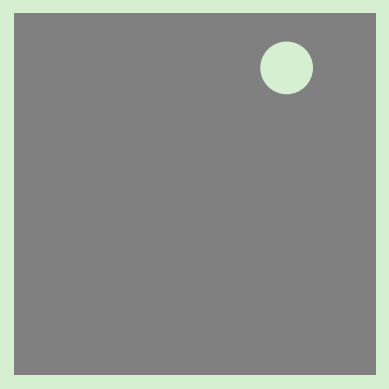

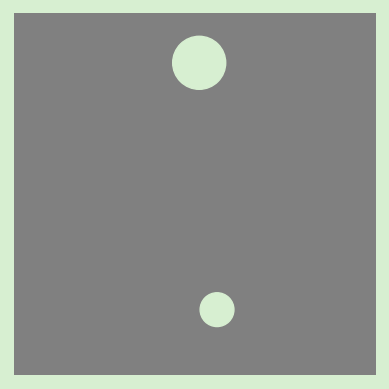

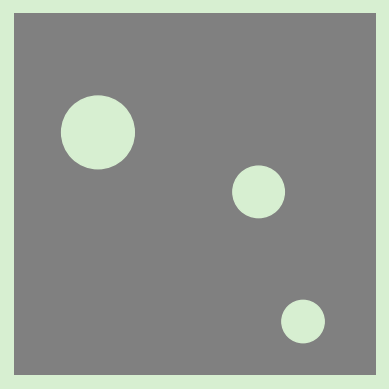

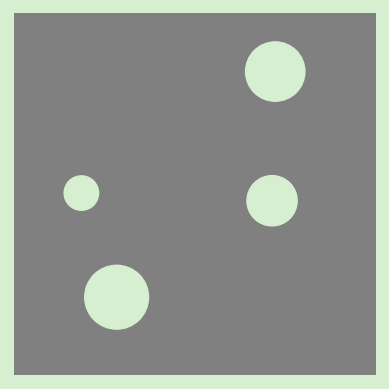

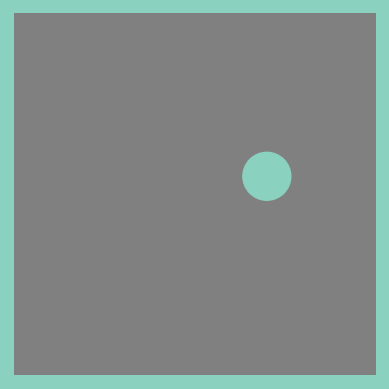

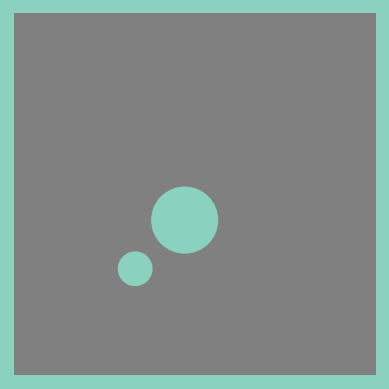

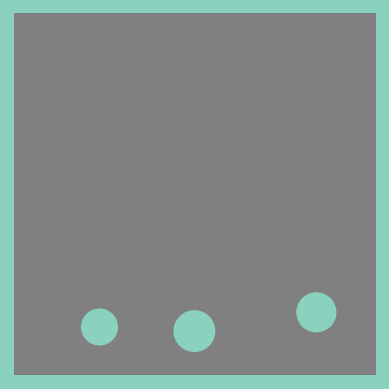

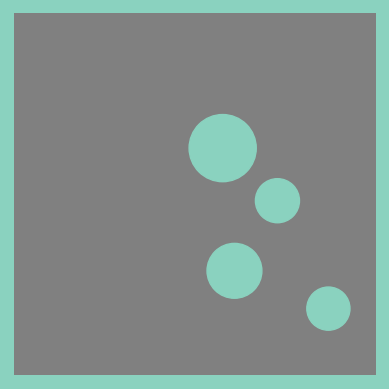

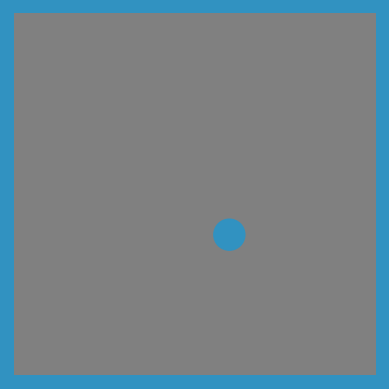

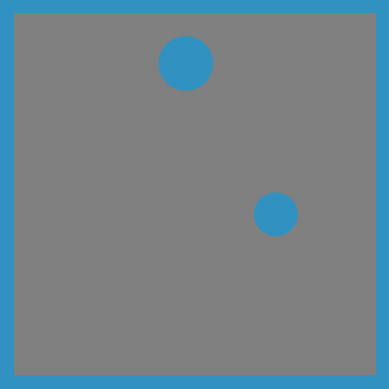

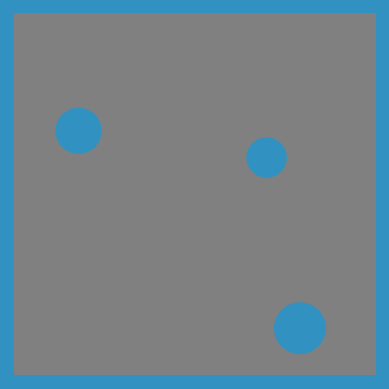

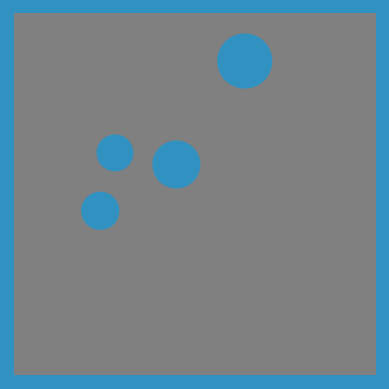

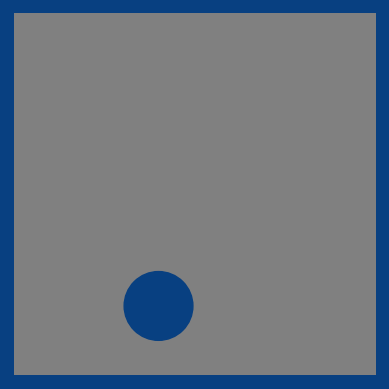

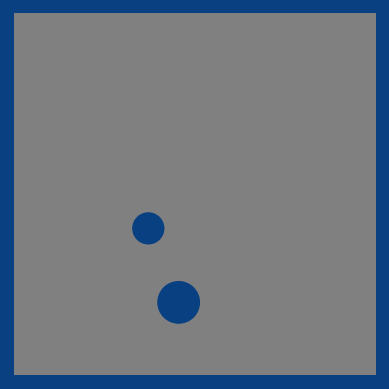

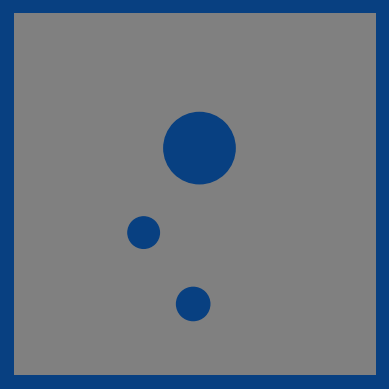

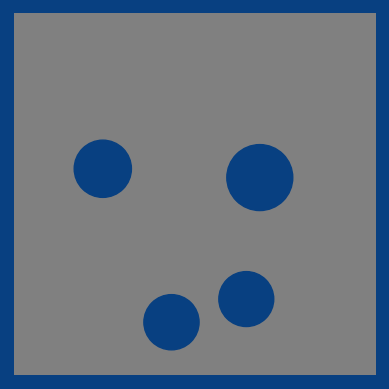

In [755]:
new_set = generate_dice(2)

In [733]:
colormap_list = plt.colormaps()

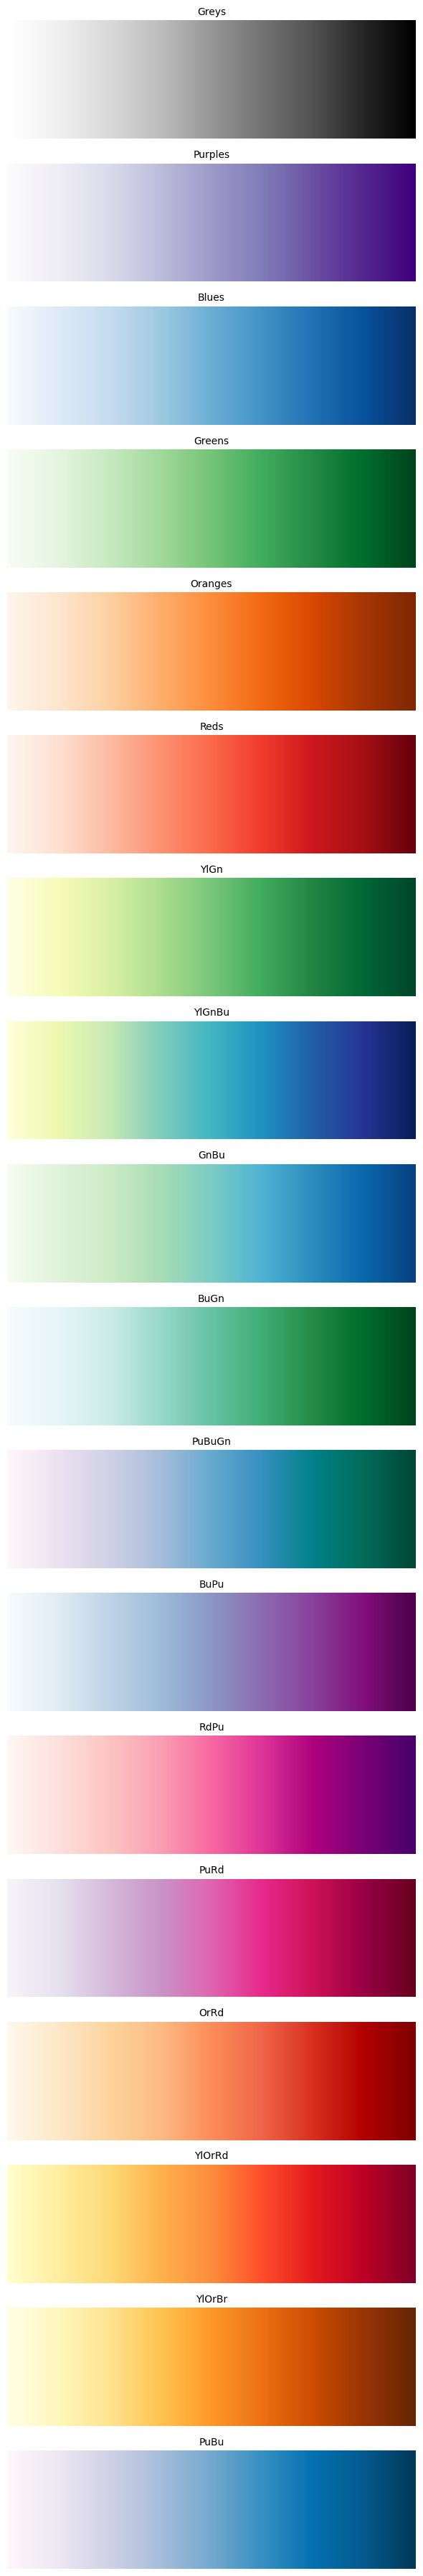

In [736]:


# Display each colormap
fig, axs = plt.subplots(len(colormaps), 1, figsize=(6, 2 * len(colormaps)))

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

for ax, cmap_name in zip(axs, colormaps):
    ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(cmap_name))
    ax.set_title(cmap_name, fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()